1. Simple Moving Average
2. Cumulative Moving Average
2. Exponential Weighted Moving Average
4. Moving Average (Formula)  -->> ACF(MA)
5. Auto Regressive Model  -->> PACF(AR)

In [29]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [30]:
# Stock data

df_rel = yf.download("RELIANCE.NS", start="2020-01-01", end="2023-02-03")
df_rel = df_rel.round(2)

[*********************100%***********************]  1 of 1 completed


In [31]:
# sorting data by date

df_rel.sort_values(by ='Date', ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,2318.00,2348.00,2311.00,2326.95,2326.95,6305317
2023-02-01,2379.95,2379.95,2305.00,2339.90,2339.90,8929007
2023-01-31,2382.00,2387.65,2341.00,2353.85,2353.85,10472167
2023-01-30,2331.70,2371.90,2301.00,2359.75,2359.75,10047822
2023-01-27,2384.40,2387.35,2311.65,2337.35,2337.35,11920991
...,...,...,...,...,...,...
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434


### Simple Moving Average
Smmothning the graph

<AxesSubplot:xlabel='Date'>

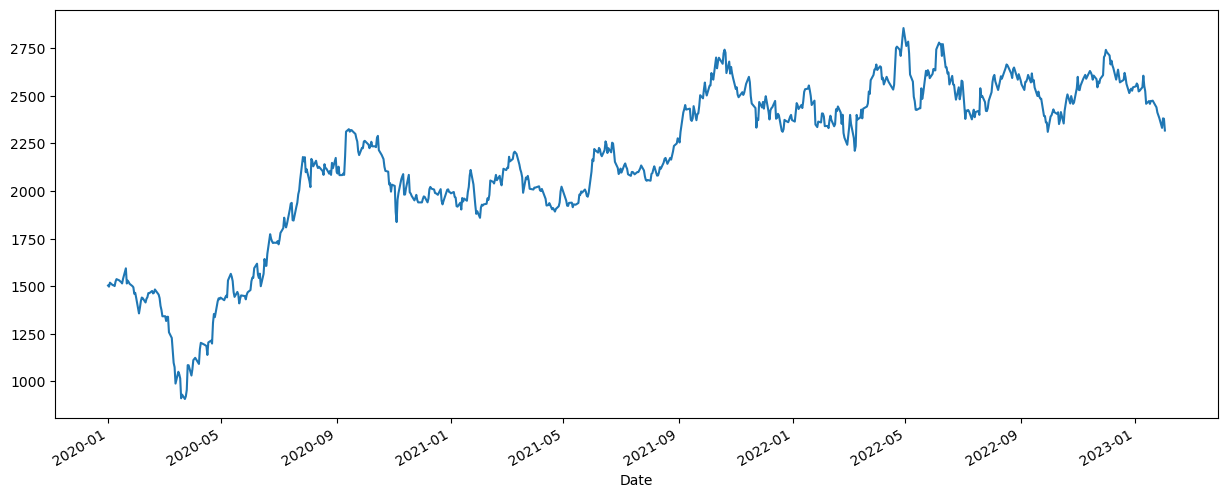

In [33]:
df_rel['Open'].plot(figsize=(15,6))

In [35]:
df_rel['Open:10 days rolling'] = df_rel['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

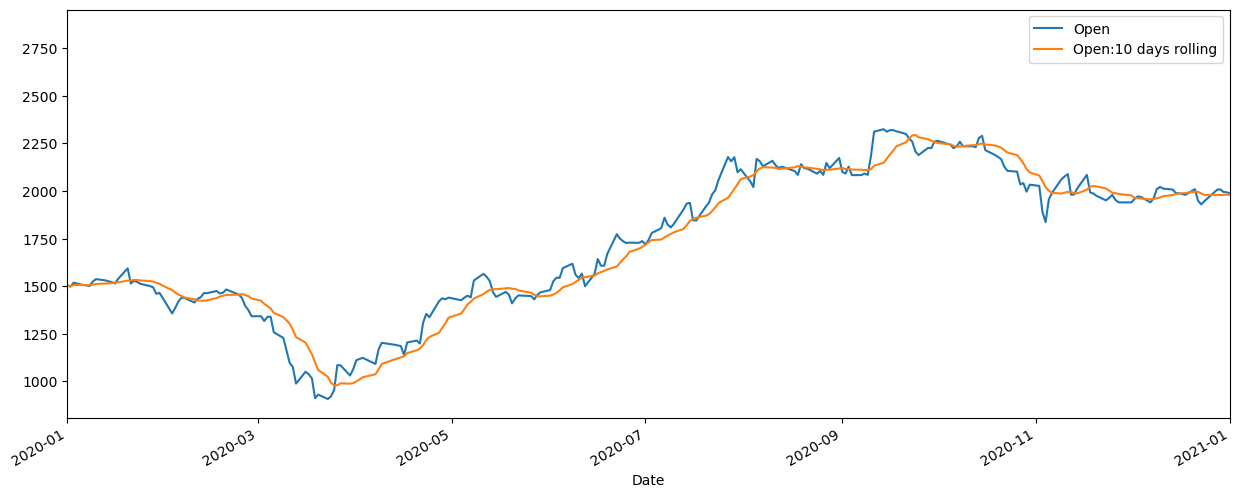

In [36]:
df_rel[['Open', 'Open:10 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [37]:
df_rel['Open:30 days rolling'] = df_rel['Open'].rolling(window=30, min_periods=1).mean()
df_rel['Open:50 days rolling'] = df_rel['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

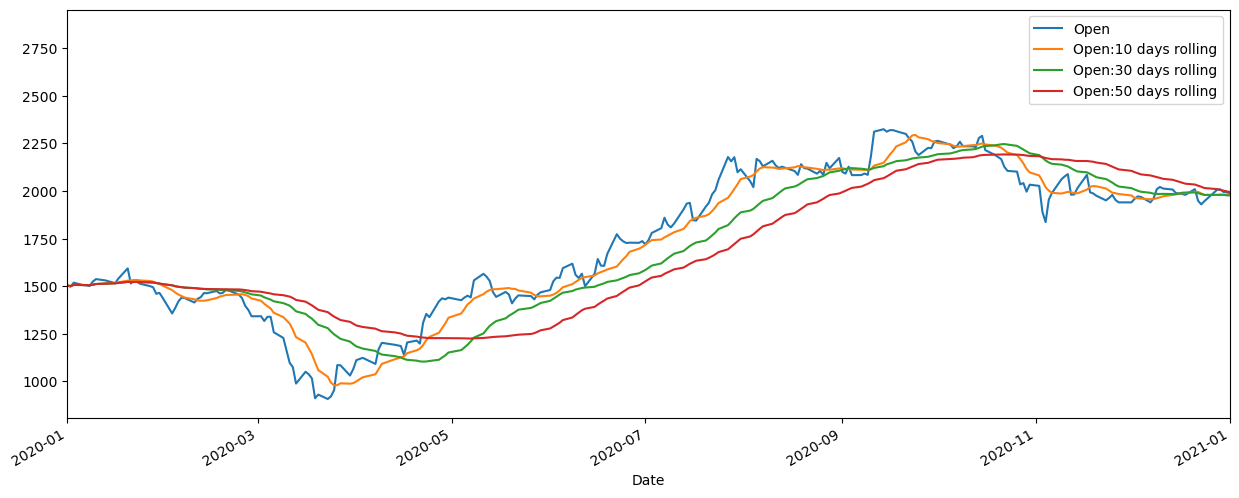

In [38]:
df_rel[['Open', 'Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

<AxesSubplot:xlabel='Date'>

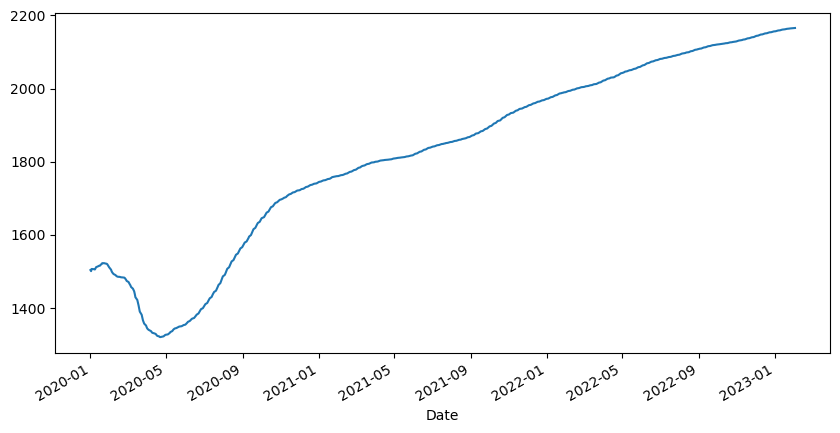

In [41]:
# Cumulative Moving Average

# Expanding

df_rel['Open'].expanding().mean().plot(figsize=(10,5))

### EWMA- Exponential Weight Moving Average

In [43]:
## EMA
# Smoothning factor 0.1

df_rel['EMA_0.1'] = df_rel['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

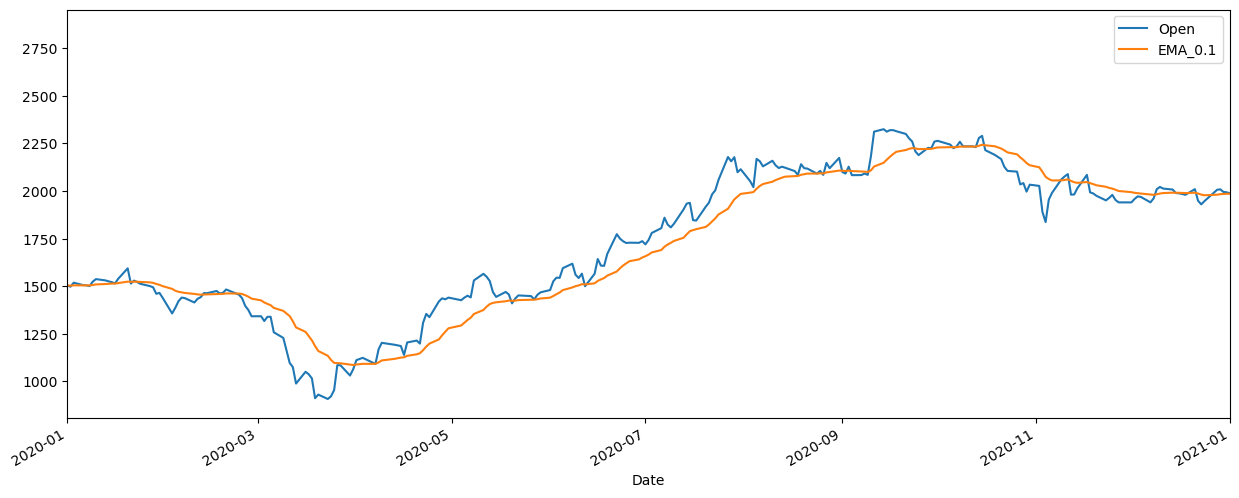

In [44]:
df_rel[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [45]:
# Smoothning factor 0.3

df_rel['EMA_0.3'] = df_rel['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

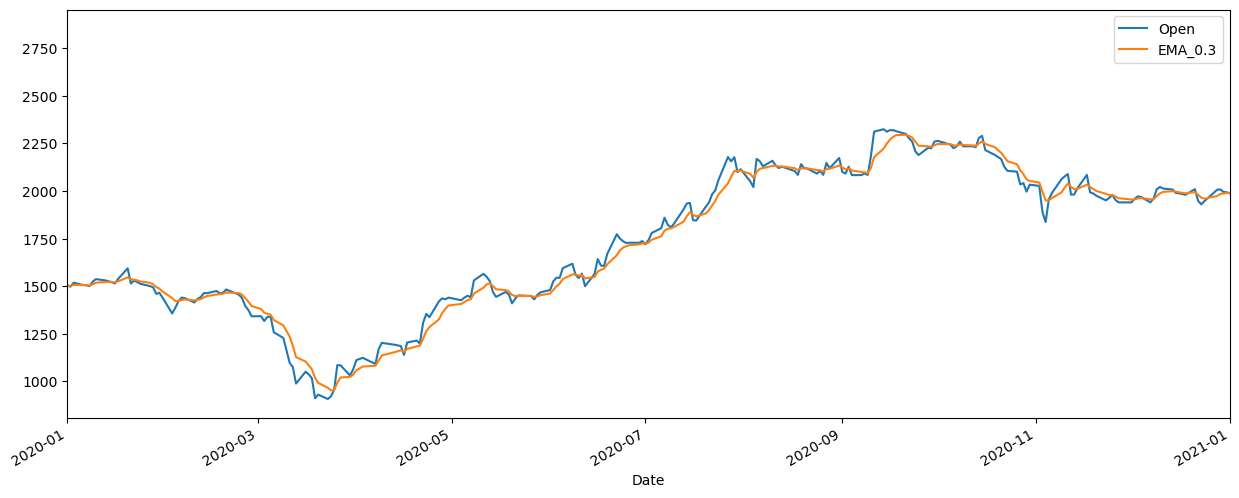

In [46]:
df_rel[['Open', 'EMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [48]:
## EWMA
# Smoothning factor 0.1

df_rel['EWMA_5days'] = df_rel['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

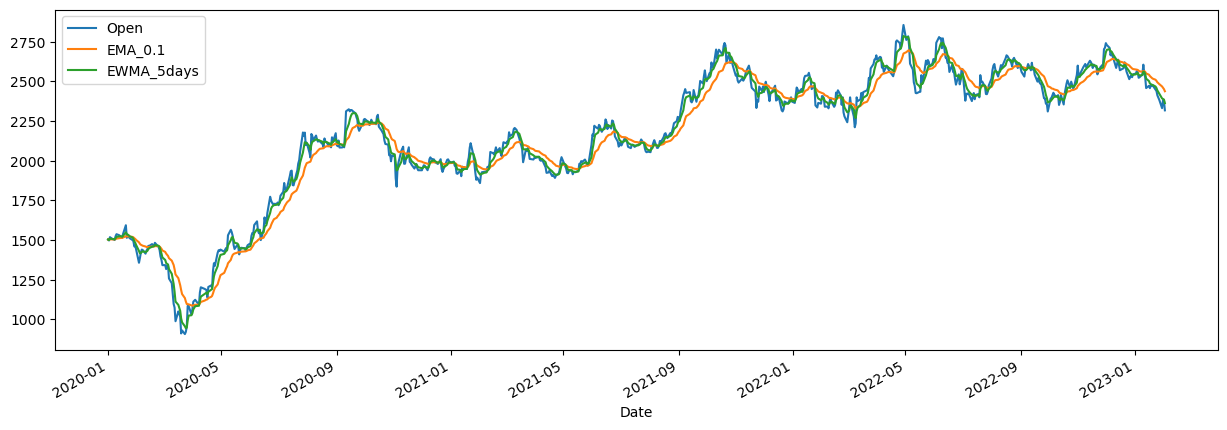

In [54]:
df_rel[['Open', 'EMA_0.1', 'EWMA_5days']].plot(figsize=(15,5))